In [75]:
import numpy as np
import pandas as pd
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')

In [76]:
#df_train.head()

In [77]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [78]:
df_train = df_train.drop(['PassengerId','Name','Ticket'],axis=1)

In [79]:
df_test = df_test.drop(['PassengerId','Name','Ticket'],axis=1)

In [80]:
df_train = df_train.drop(['Cabin'],axis=1)
df_test = df_test.drop(['Cabin'],axis=1)

In [81]:
print(df_train.shape)
df_train.isnull().sum()

(891, 8)


Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [82]:
df_test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [17]:
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].mean())
df_train['Embarked'] = df_train['Embarked'].fillna(df_train['Age'].mean())
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [19]:
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].mean())
df_test['Embarked'] = df_test['Embarked'].fillna(df_test['Age'].mean())
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].mean())
df_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

C:\Users\Sys\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


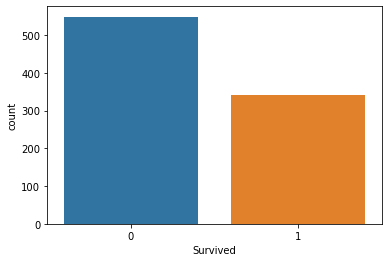

In [21]:
import seaborn as sns
sns.countplot(df_train['Survived']);

In [29]:
df_train['Sex'] = df_train['Sex'].replace({'male':1,'female':0})
df_test['Sex'] = df_test['Sex'].replace({'male':1,'female':0})

In [37]:
df_train_num = df_train.select_dtypes(include=np.number).drop('Survived',axis=1)
df_train_cat = df_train.select_dtypes(include='object')
df_test_cat = df_test.select_dtypes(include='object')
df_test_num = df_test.select_dtypes(include=np.number)

In [38]:
df_train_num.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500


In [34]:
dummies = pd.get_dummies(df_train_cat,drop_first=True)
dummies_test =  pd.get_dummies(df_test_cat,drop_first=True)

In [35]:
new_x_train = pd.concat([df_train_num,dummies],axis=1)

In [36]:
new_x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,22.0,1,0,7.2500,0,0,1
1,1,0,38.0,1,0,71.2833,1,0,0
2,3,0,26.0,0,0,7.9250,0,0,1
3,1,0,35.0,1,0,53.1000,0,0,1
4,3,1,35.0,0,0,8.0500,0,0,1


In [39]:
new_x_test = pd.concat([df_test_num,dummies_test],axis=1)

In [58]:
x = new_x_train.drop('Embarked_C',axis=1)
y = df_train['Survived']
from imblearn.over_sampling import SMOTE
x_train_bal,y_train_bal = SMOTE().fit_resample(x,y)

In [59]:
y_train_bal.value_counts()

0    549
1    549
Name: Survived, dtype: int64

In [60]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
base_model = sm.Logit(y_train_bal,x_train_bal).fit()

Optimization terminated successfully.
         Current function value: 0.494535
         Iterations 7


In [61]:
print(base_model.summary())

                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                 1098
Model:                          Logit   Df Residuals:                     1090
Method:                           MLE   Df Model:                            7
Date:                Sun, 28 Nov 2021   Pseudo R-squ.:                  0.2865
Time:                        21:52:58   Log-Likelihood:                -543.00
converged:                       True   LL-Null:                       -761.08
Covariance Type:            nonrobust   LLR p-value:                 4.176e-90
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass         0.2897      0.074      3.891      0.000       0.144       0.436
Sex           -2.5435      0.165    -15.404      0.000      -2.867      -2.220
Age            0.0075      0.005      1.408      0.1

In [62]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model = lr.fit(x_train_bal,y_train_bal)

C:\Users\Sys\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [66]:
y_pred = model.predict(new_x_test)
y_pred = pd.DataFrame(y_pred)
y_pred.head()

,0
0,0
1,0
2,0
3,0
4,1


In [67]:
gender_submission = pd.read_csv('gender_submission.csv')
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [71]:
from sklearn.metrics import accuracy_score
accuracy_score(gender_submission['Survived'],y_pred)*100

91.6267942583732

In [73]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf_model = rf.fit(x_train_bal,y_train_bal)
y_pred = rf_model.predict(new_x_test)
accuracy_score(gender_submission['Survived'],y_pred)*100

78.4688995215311

In [74]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb_model = xgb.fit(x_train_bal,y_train_bal)
y_pred_xg = xgb_model.predict(new_x_test)
accuracy_score(gender_submission['Survived'],y_pred_xg)*100

C:\Users\Sys\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:59:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


80.622009569378